In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import joblib
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

In [2]:
MODEL_FILE = "svm_digit_model.joblib"
SCALER_FILE = "digit_scaler.joblib"
ENCODER_FILE = "digit_label_encoder.joblib"

In [7]:
three_img = cv2.imread('out.png', cv2.IMREAD_GRAYSCALE)
_, thres_hold = cv2.threshold(three_img, 127, 255, cv2.THRESH_BINARY)
inverted = cv2.bitwise_not(thres_hold)
predicting_digit = cv2.resize(inverted, (28, 28))
flattern_predicting_image = predicting_digit.flatten().reshape(1, -1)

[ WARN:0@1832.729] global loadsave.cpp:275 findDecoder imread_('out.png'): can't open/read file: check file path/integrity


error: OpenCV(4.12.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [4]:
if os.path.exists(MODEL_FILE) and os.path.exists(SCALER_FILE) and os.path.exists(ENCODER_FILE):
    print("Loading saved model, scaler, and encoder...")
    svm_model = joblib.load(MODEL_FILE)
    standardScaler = joblib.load(SCALER_FILE)
    label_encoder = joblib.load(ENCODER_FILE)

else:
    print("Training model for the first time...")

    
    train_data = pd.read_csv('train.csv')
    X = train_data.drop('label', axis=1)
    y = train_data['label']

    
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

    
    standardScaler = StandardScaler()
    X_train = standardScaler.fit_transform(X_train)
    X_test = standardScaler.transform(X_test)

   
    param_grid = {
        'C': [1, 2, 5],
        'kernel': ['rbf'],
        'gamma': ['scale', 'auto']
    }
    grid_search = GridSearchCV(SVC(), param_grid, cv=2, scoring='accuracy', verbose=0)
    grid_search.fit(X_train, y_train)

    print(f"Best parameters: {grid_search.best_params_}")
    svm_model = grid_search.best_estimator_

    joblib.dump(svm_model, MODEL_FILE)
    joblib.dump(standardScaler, SCALER_FILE)
    joblib.dump(label_encoder, ENCODER_FILE)
    print("Model, scaler, and encoder saved.")



Training model for the first time...
Best parameters: {'C': 5, 'gamma': 'auto', 'kernel': 'rbf'}
Model, scaler, and encoder saved.


Predicted Digit: 2


/Users/aadityakafle/Documents/NEWFOLDER/batch_13/myenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


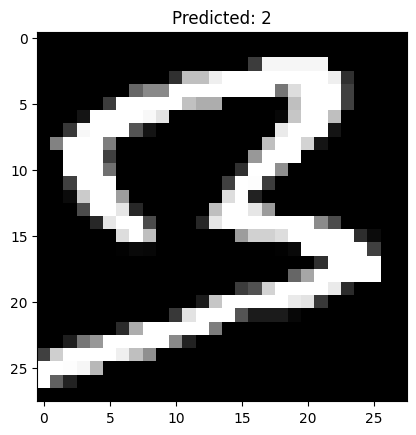

In [9]:
input_scaled = standardScaler.transform(flattern_predicting_image)
pred_encoded = svm_model.predict(input_scaled)
predicted_label = label_encoder.inverse_transform(pred_encoded)
print("Predicted Digit:", predicted_label[0])

plt.imshow(predicting_digit, cmap='gray')
plt.title(f"Predicted: {predicted_label[0]}")
plt.show()